# Modèle de classification Ethiquette DPE

## Chargement du modele

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [192]:
data = pd.read_csv("D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_Energetique\\Data\\data69rhone.csv")
print(data.shape)
data.head()

C:\Users\karam\AppData\Local\Temp\ipykernel_15684\2385052526.py:1: DtypeWarning: Columns (3,27,39,106) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("D:\\M2 SISE\\Python Machine Learning\\Projet\\Performance_Energetique\\Data\\data69rhone.csv")


(287165, 127)


,Conso_chauffage_dépensier_é_finale,Nom__commune_(BAN),Emission_GES_chauffage,Besoin_refroidissement,Coût_total_5_usages,Coordonnée_cartographique_X_(BAN),Nombre_niveau_logement,Type_installation_ECS_(général),Déperditions_murs,Conso_5_usages_par_m²_é_primaire,...,Coût_chauffage_énergie_n°2,N°_DPE_immeuble_associé,Catégorie_ENR,Logement,Annee_reception_DPE,Somme_coûts,Vérification_coût_total,Coût chauffage en %,passoire_energetique,Periode_construction
0,5849.5,Lyon,380.0,0,1360.0,842365.11,1.0,individuel,57.3,535.0,...,NaN,NaN,NaN,ancien,2024,1360.0,True,76.470588,True,Avant 1960
1,10243.9,Lyon,669.0,0,2195.5,842432.78,1.0,individuel,85.1,583.0,...,NaN,NaN,NaN,ancien,2024,2195.5,False,80.441813,True,NaN
2,15941.8,Lyon,2996.1,0,1684.8,842540.42,1.0,individuel,82.3,386.0,...,0.0,NaN,NaN,ancien,2024,1684.8,False,83.891263,True,NaN
3,10499.9,Lyon,1936.4,0,1369.4,842600.66,1.0,individuel,24.9,156.0,...,0.0,NaN,NaN,ancien,2024,1369.3,False,69.818899,False,NaN
4,956.1,Lyon,58.7,0,544.6,842544.94,1.0,individuel,3.6,152.0,...,NaN,NaN,NaN,ancien,2024,544.6,True,36.412046,False,NaN


In [193]:
data['Periode_construction']

0         Avant 1960
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
287160    Après 2010
287161    Après 2010
287162    Après 2010
287163    Après 2010
287164    Après 2010
Name: Periode_construction, Length: 287165, dtype: object

In [194]:
# Vérification des valeurs manquantes par colonne
missing_data = data.isnull().sum().sort_values(ascending=False)
print("Valeurs manquantes:\n", missing_data[missing_data > 0])

Valeurs manquantes:
 Catégorie_ENR                           222081
N°_DPE_immeuble_associé                 206930
Appartement_non_visité_(0/1)            180027
Nombre_niveau_immeuble                  167795
Inertie_lourde_(0/1)                    136876
                                         ...  
Conso_chauffage_é_finale                     6
Emission_GES_chauffage_dépensier             6
Conso_chauffage_dépensier_é_primaire         6
Conso_auxiliaires_é_finale                   1
Ubat_W/m²_K                                  1
Length: 80, dtype: int64


In [195]:
# Affiche le nombre de valeurs manquantes pour chaque colonne
print(data["Etiquette_DPE"].isnull().sum())

0


In [ ]:
data['Etiquette_DPE']



0         G
1         G
2         F
3         D
4         C
         ..
287160    A
287161    A
287162    A
287163    A
287164    A
Name: Etiquette_DPE, Length: 287165, dtype: object

In [197]:
# Imputation pour les colonnes avec peu de valeurs manquantes
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
    
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\karam\AppData\Local\Temp\ipykernel_15684\1086663217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\karam\AppData\Local\Temp\ipykernel_15684\1086663217.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [198]:
for  i in  data.columns: 
    print(i)

Conso_chauffage_dépensier_é_finale
Nom__commune_(BAN)
Emission_GES_chauffage
Besoin_refroidissement
Coût_total_5_usages
Coordonnée_cartographique_X_(BAN)
Nombre_niveau_logement
Type_installation_ECS_(général)
Déperditions_murs
Conso_5_usages_par_m²_é_primaire
Coût_refroidissement
Ubat_W/m²_K
Coût_ECS_dépensier
Emission_GES_auxiliaires
Année_construction
Emission_GES_5_usages_par_m²
Emission_GES_éclairage
Conso_ECS_dépensier_é_finale
Adresse_(BAN)
Date_visite_diagnostiqueur
Coût_ECS
Nombre_niveau_immeuble
Surface_habitable_immeuble
Complément_d'adresse_logement
Coût_éclairage
Date_établissement_DPE
N°_voie_(BAN)
Besoin_ECS
N°DPE
Conso_refroidissement_é_finale
Logement_traversant_(0/1)
Conso_chauffage_é_primaire
Appartement_non_visité_(0/1)
Adresse_brute
Conso_éclairage_é_primaire
Qualité_isolation_menuiseries
Qualité_isolation_murs
Emission_GES_5_usages_énergie_n°1
Statut_géocodage
Classe_inertie_bâtiment
Nombre_appartement
Modèle_DPE
Conso_5_usages_é_finale
N°_département_(BAN)
Conso_r

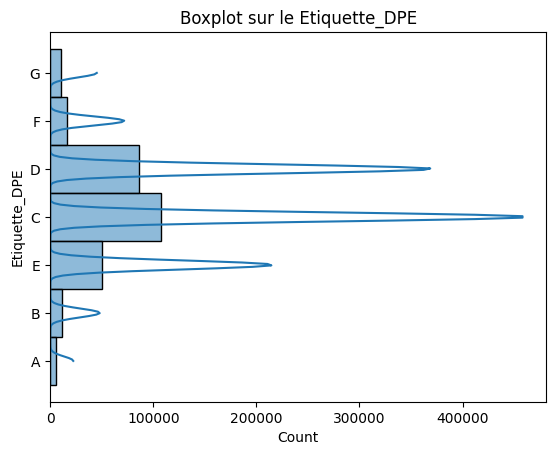

In [199]:
target = "Etiquette_DPE"
# Créer un boxplot pour une colonne spécifique
sns.histplot(data=data, y = target,  bins=10,  kde=True)

# Afficher le graphique
plt.title(f'Boxplot sur le {target}')
plt.show()

In [200]:
#le type de la colone Etiquette_DPE
data['Etiquette_DPE'].dtype

dtype('O')

In [201]:
data['Besoin_ECS']

0            848,1
1           1022,5
2             1006
3           1295,3
4            894,3
            ...   
287160    358405,8
287161    358405,8
287162    358405,8
287163    358405,8
287164    358405,8
Name: Besoin_ECS, Length: 287165, dtype: object

In [202]:
# Correction des champs non homogènes avec une virgule comme séparateur
# Ici, on remplace les virgules par des points, puis on convertit en float

data['Besoin_ECS'] = pd.to_numeric(data['Besoin_ECS'].replace(',', '.', regex=True), errors='coerce')

# Vérification des types après conversion
print(data['Besoin_ECS'].dtype)


float64


In [203]:
data['Besoin_ECS']

0            848.1
1           1022.5
2           1006.0
3           1295.3
4            894.3
            ...   
287160    358405.8
287161    358405.8
287162    358405.8
287163    358405.8
287164    358405.8
Name: Besoin_ECS, Length: 287165, dtype: float64

In [204]:
ls_variables_explicatives = [
    'Année_construction',
    'Besoin_ECS',
    'Besoin_chauffage',
    'Coût_chauffage',
    'Coût_total_5_usages',
    'Conso_5_usages/m²_é_finale',
    'Conso_5_usages_par_m²_é_primaire',
    'Conso_5_usages_é_finale_énergie_n°1',
    'Conso_auxiliaires_é_finale',
    'Conso_ECS_é_primaire',
    'Conso_ECS_dépensier_é_finale',
    'Conso_chauffage_é_finale',
    'Conso_chauffage_é_primaire',
    'Conso_éclairage_é_finale',
    'Conso_refroidissement_é_finale',
    'Deperditions_baies_vitrées',
    'Déperditions_murs',
    'Deperditions_planchers_bas',
    'Deperditions_planchers_hauts',
    'Déperditions_ponts_thermiques',
    'Déperditions_renouvellement_air',
    'Deperditions_enveloppe',
    'Emission_GES_5_usages_par_m²',
    'Emission_GES_chauffage',
    'Emission_GES_refroidissement',
    'Inertie_lourde_(0/1)',
    'Nombre_appartement',
    'Nombre_niveau_logement',
    'Periode_construction',
    'Surface_habitable_immeuble',
    'Surface_habitable_logement',
    'Type_bâtiment',
    'Type_énergie_principale_chauffage',
    'Type_installation_chauffage',
    'Zone_climatique_',
    'Qualité_isolation_murs',
    'Qualité_isolation_plancher_bas'
]

In [205]:
print(data[ls_variables_explicatives].dtypes)

Année_construction                     float64
Besoin_ECS                             float64
Besoin_chauffage                       float64
Coût_chauffage                         float64
Coût_total_5_usages                    float64
Conso_5_usages/m²_é_finale             float64
Conso_5_usages_par_m²_é_primaire       float64
Conso_5_usages_é_finale_énergie_n°1    float64
Conso_auxiliaires_é_finale             float64
Conso_ECS_é_primaire                   float64
Conso_ECS_dépensier_é_finale           float64
Conso_chauffage_é_finale               float64
Conso_chauffage_é_primaire             float64
Conso_éclairage_é_finale               float64
Conso_refroidissement_é_finale         float64
Deperditions_baies_vitrées             float64
Déperditions_murs                      float64
Deperditions_planchers_bas             float64
Deperditions_planchers_hauts           float64
Déperditions_ponts_thermiques          float64
Déperditions_renouvellement_air        float64
Deperditions_

In [206]:
# Vérification des données manquantes
data[ls_variables_explicatives].isnull().mean().sort_values(ascending=False)

Année_construction                     0.0
Besoin_ECS                             0.0
Besoin_chauffage                       0.0
Coût_chauffage                         0.0
Coût_total_5_usages                    0.0
Conso_5_usages/m²_é_finale             0.0
Conso_5_usages_par_m²_é_primaire       0.0
Conso_5_usages_é_finale_énergie_n°1    0.0
Conso_auxiliaires_é_finale             0.0
Conso_ECS_é_primaire                   0.0
Conso_ECS_dépensier_é_finale           0.0
Conso_chauffage_é_finale               0.0
Conso_chauffage_é_primaire             0.0
Conso_éclairage_é_finale               0.0
Conso_refroidissement_é_finale         0.0
Deperditions_baies_vitrées             0.0
Déperditions_murs                      0.0
Deperditions_planchers_bas             0.0
Deperditions_planchers_hauts           0.0
Déperditions_ponts_thermiques          0.0
Déperditions_renouvellement_air        0.0
Deperditions_enveloppe                 0.0
Emission_GES_5_usages_par_m²           0.0
Emission_GE

In [207]:
# Sélectionner toutes les colonnes non numériques (qualitatives)
categorical_cols = data[ls_variables_explicatives].select_dtypes(exclude=[np.number]).columns

categorical_cols

Index(['Inertie_lourde_(0/1)', 'Periode_construction', 'Type_bâtiment',
       'Type_énergie_principale_chauffage', 'Type_installation_chauffage',
       'Zone_climatique_', 'Qualité_isolation_murs',
       'Qualité_isolation_plancher_bas'],
      dtype='object')

In [208]:
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder  =  OrdinalEncoder()
# encoding categorical data

data[categorical_cols] = ordinalEncoder.fit_transform(data[categorical_cols])

In [209]:
#data[categorical_cols].dtypes

In [210]:
# Sélectionner uniquement les colonnes quantitatives (numériques)
quant_cols = data[ls_variables_explicatives].select_dtypes(include=[np.number]).columns

# Afficher les colonnes quantitatives
print("Colonnes quantitatives :", quant_cols)

Colonnes quantitatives : Index(['Année_construction', 'Besoin_ECS', 'Besoin_chauffage',
       'Coût_chauffage', 'Coût_total_5_usages', 'Conso_5_usages/m²_é_finale',
       'Conso_5_usages_par_m²_é_primaire',
       'Conso_5_usages_é_finale_énergie_n°1', 'Conso_auxiliaires_é_finale',
       'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_finale',
       'Conso_chauffage_é_finale', 'Conso_chauffage_é_primaire',
       'Conso_éclairage_é_finale', 'Conso_refroidissement_é_finale',
       'Deperditions_baies_vitrées', 'Déperditions_murs',
       'Deperditions_planchers_bas', 'Deperditions_planchers_hauts',
       'Déperditions_ponts_thermiques', 'Déperditions_renouvellement_air',
       'Deperditions_enveloppe', 'Emission_GES_5_usages_par_m²',
       'Emission_GES_chauffage', 'Emission_GES_refroidissement',
       'Inertie_lourde_(0/1)', 'Nombre_appartement', 'Nombre_niveau_logement',
       'Periode_construction', 'Surface_habitable_immeuble',
       'Surface_habitable_logement', 'Type_bât

In [211]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Remplacer les valeurs manquantes dans les colonnes catégorielles par une chaîne, par exemple "inconnu"
data[categorical_cols] = data[categorical_cols].fillna("inconnu")

# 2. Vérifier que les colonnes catégorielles contiennent bien des chaînes de caractères uniquement
for col in categorical_cols:
    data[col] = data[col].astype(str)  # S'assurer que toutes les valeurs sont bien des chaînes

# 3. Appliquer l'encoder ordinal
from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder = OrdinalEncoder()
data[categorical_cols] = ordinalEncoder.fit_transform(data[categorical_cols])


In [212]:
data[categorical_cols].dtypes

Inertie_lourde_(0/1)                 float64
Periode_construction                 float64
Type_bâtiment                        float64
Type_énergie_principale_chauffage    float64
Type_installation_chauffage          float64
Zone_climatique_                     float64
Qualité_isolation_murs               float64
Qualité_isolation_plancher_bas       float64
dtype: object

In [213]:
data['Etiquette_DPE']

0         G
1         G
2         F
3         D
4         C
         ..
287160    A
287161    A
287162    A
287163    A
287164    A
Name: Etiquette_DPE, Length: 287165, dtype: object

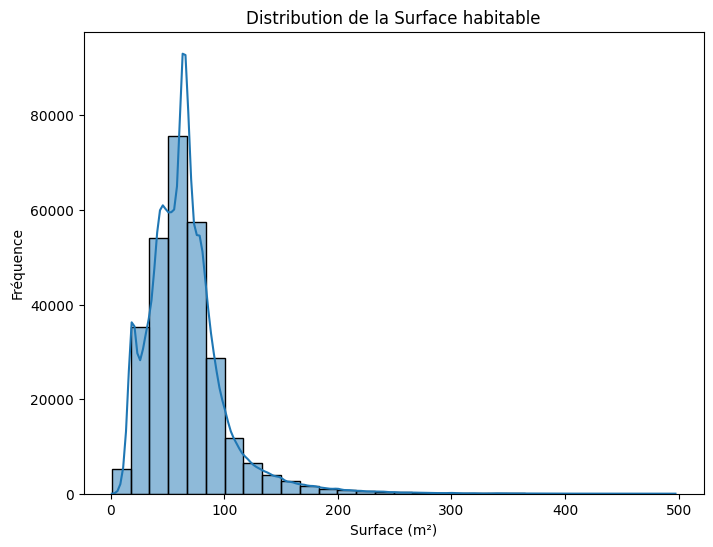

In [214]:
import matplotlib.pyplot as plt 
import seaborn as sns

sub_df = data[data['Surface_habitable_logement']<500]
plt.figure(figsize=(8, 6))
sns.histplot(sub_df['Surface_habitable_logement'], bins=30, kde=True)
plt.title('Distribution de la Surface habitable')
plt.xlabel('Surface (m²)')
plt.ylabel('Fréquence')
plt.show()

## Echantillonnage

In [215]:
# Affiche le nombre de valeurs manquantes pour chaque colonne
print(data.isnull().sum())

Conso_chauffage_dépensier_é_finale    0
Nom__commune_(BAN)                    0
Emission_GES_chauffage                0
Besoin_refroidissement                0
Coût_total_5_usages                   0
                                     ..
Somme_coûts                           0
Vérification_coût_total               0
Coût chauffage en %                   0
passoire_energetique                  0
Periode_construction                  0
Length: 127, dtype: int64


In [216]:
X = data[data.columns.difference(['Etiquette_DPE'])]

In [217]:
X = data[quant_cols]

In [218]:
Y = data['Etiquette_DPE']

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.30,
                                                    stratify = Y,
                                                    random_state = 42)

In [220]:
from sklearn.impute import SimpleImputer

# Imputation des NaN par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [221]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Etiquette_DPE
C    0.374869
D    0.299396
E    0.174277
F    0.058062
B    0.038839
G    0.036494
A    0.018062
Name: proportion, dtype: float64

In [222]:
print(X_train.shape)
print(X_test.shape)


(201015, 37)
(86150, 37)


## Arbre de décision

In [223]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

model_arbre = DecisionTreeClassifier(max_depth=3 , min_samples_leaf=50, min_samples_split=100)
model_arbre = model_arbre.fit(X_train,y_train)

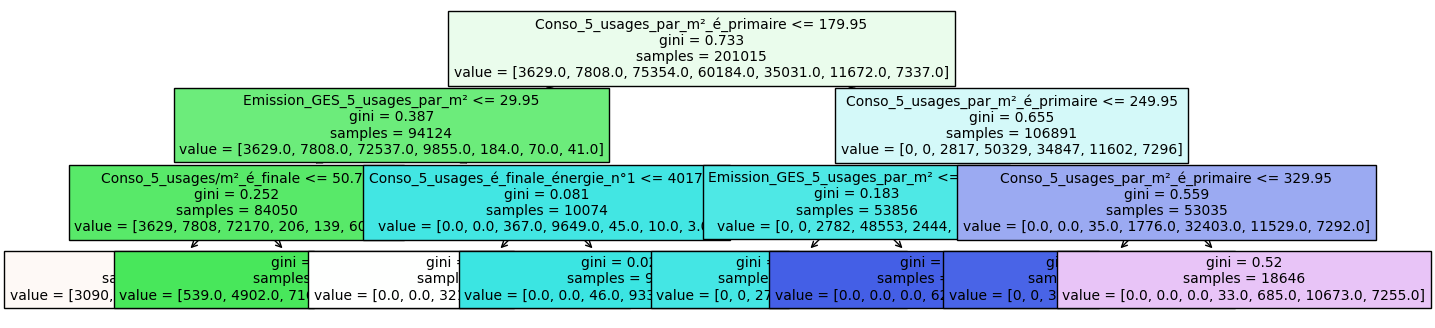

In [224]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,4))
plot_tree(model_arbre,feature_names = list(X.columns),filled=True, fontsize=10)
plt.show()

In [225]:
y_pred = model_arbre.predict(X_test)
y_pred

array(['E', 'D', 'C', ..., 'D', 'E', 'D'], dtype=object)

In [226]:
y_pred_proba = model_arbre.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.00000000e+00, 0.00000000e+00, 1.01776731e-03, 5.06848120e-02,
        9.22329815e-01, 2.48916805e-02, 1.07592544e-03],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1.94988788e-05, 7.79955153e-05],
       [6.97888208e-03, 6.34702782e-02, 9.27543926e-01, 7.38026491e-04,
        7.25078658e-04, 2.84852330e-04, 2.58956664e-04],
       [0.00000000e+00, 0.00000000e+00, 1.01776731e-03, 5.06848120e-02,
        9.22329815e-01, 2.48916805e-02, 1.07592544e-03],
       [6.97888208e-03, 6.34702782e-02, 9.27543926e-01, 7.38026491e-04,
        7.25078658e-04, 2.84852330e-04, 2.58956664e-04],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1.94988788e-05, 7.79955153e-05],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1.94988788e-05, 7.79955153e-05],
       [0.00000000e+00, 0.00000000e+00, 5.42458809e-02, 9.45520133e-01,
        1.36492152e-04, 1

## Evaluation de modèle

In [227]:
pd.crosstab(y_test,y_pred, colnames=['pred'], rownames=['obs'], margins=True)

pred,A,C,D,E,F,All
obs,,,,,,
A,1299,257,0,0,0,1556
B,1258,2088,0,0,0,3346
C,238,30845,1199,12,1,32295
D,58,188,24790,734,23,25793
E,39,19,28,14615,313,15014
F,15,6,1,413,4567,5002
G,11,11,2,14,3106,3144
All,2918,33414,26020,15788,8010,86150


In [228]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8835287289611143


In [229]:
from sklearn.metrics import recall_score, precision_score

# Choix de 'macro' ou 'weighted' pour une moyenne équilibrée entre les classes
print('recall : ' + str(recall_score(y_test, y_pred, average='macro')))
print('precision : ' + str(precision_score(y_test, y_pred, average='macro')))


recall : 0.6625010548250124
precision : 0.5452682879105256


d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [230]:
from sklearn.metrics import f1_score

# Utilisation de 'macro' pour une moyenne équilibrée entre les classes
print('f1_score : ' + str(f1_score(y_test, y_pred, average='macro')))


f1_score : 0.5896227545903325


In [231]:
print('recall : ' + str(recall_score(y_test,y_pred,average='macro')))
print('precision : ' + str(precision_score(y_test,y_pred, average='macro')))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

recall : 0.6625010548250124


d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


precision : 0.5452682879105256
f1_score : 0.5896227545903325


In [232]:
print('recall : ' + str(recall_score(y_test,y_pred,average='weighted')))
print('precision : ' + str(precision_score(y_test,y_pred, average='weighted')))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='weighted')))

recall : 0.8835287289611143


d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


precision : 0.8337655559800325
f1_score : 0.855062746068111


In [233]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report

model_arbre_cv = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(model_arbre_cv, X_train, y_train, cv=5, scoring='f1_macro')

print(f"Scores de validation croisée:{cv_scores}") # permet de savoir comment le modele prédit (surapprentissage ?)
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

model_arbre_cv.fit(X_train, y_train)

y_pred_arbre_cv = model_arbre.predict(X_test)

print(classification_report(y_test, y_pred_arbre_cv)) # permet d'avoir l'ensemble les scores des metriques recall, precision , f1
print(f"Accuracy sur l'ensemble de test: {accuracy_score(y_test, y_pred_arbre_cv)}")

Scores de validation croisée:[0.98103475 0.98311406 0.97896841 0.98113586 0.9818942 ]
Moyenne des scores de validation croisée : 0.9812294543106768


d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.45      0.83      0.58      1556
           B       0.00      0.00      0.00      3346
           C       0.92      0.96      0.94     32295
           D       0.95      0.96      0.96     25793
           E       0.93      0.97      0.95     15014
           F       0.57      0.91      0.70      5002
           G       0.00      0.00      0.00      3144

    accuracy                           0.88     86150
   macro avg       0.55      0.66      0.59     86150
weighted avg       0.83      0.88      0.86     86150

Accuracy sur l'ensemble de test: 0.8835287289611143


d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## D'autres méthodes

## KNN

In [234]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [235]:
y_pred_knn = model_knn.predict(X_test)

In [236]:
from sklearn.metrics import f1_score

# Par exemple, pour le mode 'macro'
print('f1_score : ' + str(f1_score(y_test, y_pred_knn, average='macro')))

f1_score : 0.722265330441421


In [237]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred_reg = reg_log_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred_reg,average='macro', pos_label=1)))

d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score : 0.2511324782543857


In [238]:
reg_log_model.predict_proba(X_test)[0:10]

array([[2.77752417e-03, 4.58175698e-02, 2.47770070e-01, 3.43740758e-01,
        2.18418214e-01, 6.91001097e-02, 7.23757547e-02],
       [4.16623150e-04, 1.95184927e-02, 3.69604409e-01, 3.63106269e-01,
        2.01579960e-01, 2.98441308e-02, 1.59301150e-02],
       [2.43856413e-01, 1.86372454e-01, 5.61732231e-01, 8.03889886e-03,
        3.52309350e-09, 1.11201497e-13, 4.68619520e-25],
       [5.05321091e-33, 1.93971090e-11, 4.91975125e-03, 1.28452436e-01,
        4.59123107e-01, 3.63644675e-01, 4.38600298e-02],
       [1.66224828e-03, 4.14174433e-02, 3.77056593e-01, 3.21841806e-01,
        1.71457761e-01, 4.82765246e-02, 3.82876241e-02],
       [1.12357968e-03, 3.12959266e-02, 2.07969185e-01, 3.44144743e-01,
        2.40344104e-01, 9.09381219e-02, 8.41843401e-02],
       [4.34688588e-20, 1.02750688e-02, 2.03141824e-01, 3.59932351e-01,
        2.86883755e-01, 1.37152064e-01, 2.61493720e-03],
       [2.35292859e-04, 2.18712670e-02, 3.24689229e-01, 3.36338001e-01,
        2.03590209e-01, 6

In [239]:
# Création du DataFrame des coefficients avec le bon nombre de colonnes
coef = pd.DataFrame(reg_log_model.coef_[0,], index=[f'feature_{i}' for i in range(X_train.shape[1])], columns=['Coef'])
coef.loc['Constante'] = reg_log_model.intercept_[0]
print(coef)


                    Coef
feature_0  -6.243997e-05
feature_1   4.975513e-05
feature_2  -1.957257e-04
feature_3  -1.239986e-05
feature_4  -2.234542e-05
feature_5  -5.624849e-06
feature_6  -8.154590e-06
feature_7  -1.950801e-04
feature_8  -7.065827e-06
feature_9  -9.606822e-05
feature_10 -1.024764e-04
feature_11 -1.322002e-04
feature_12 -1.366836e-04
feature_13  4.307789e-06
feature_14  2.870746e-06
feature_15 -1.814958e-06
feature_16 -1.916634e-06
feature_17 -3.313122e-07
feature_18 -4.092019e-07
feature_19 -1.467287e-06
feature_20 -3.556013e-06
feature_21 -9.748861e-06
feature_22 -9.685899e-07
feature_23 -3.137693e-05
feature_24  1.044686e-07
feature_25 -9.930872e-09
feature_26 -8.667974e-07
feature_27 -4.445295e-08
feature_28 -1.128213e-07
feature_29 -1.002060e-04
feature_30  1.084361e-06
feature_31  4.038144e-08
feature_32 -3.424205e-07
feature_33 -2.261548e-08
feature_34 -6.277740e-08
feature_35 -3.591835e-09
feature_36 -6.248610e-08
Constante  -3.158569e-08


## Aller plus loin avec SMOTE pour ré équilibrer les classes

In [240]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [241]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

## Random forest

In [242]:
 
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

rf_model = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('f1_score: '+ str(f1_score(y_test, y_pred_rf, average='macro', pos_label=1)))

pd.crosstab(y_test, y_pred, colnames=['pred'], rownames=['obs'] , margins=True)

f1_score: 0.9845547891322765


pred,A,C,D,E,F,All
obs,,,,,,
A,1299,257,0,0,0,1556
B,1258,2088,0,0,0,3346
C,238,30845,1199,12,1,32295
D,58,188,24790,734,23,25793
E,39,19,28,14615,313,15014
F,15,6,1,413,4567,5002
G,11,11,2,14,3106,3144
All,2918,33414,26020,15788,8010,86150


In [243]:
# Pas besoin de .tolist() après la compréhension de liste
importances_df = pd.DataFrame(rf_model.feature_importances_,
                              index=data[ls_variables_explicatives].columns,
                              columns=['Importances']).sort_values(by='Importances', ascending=False)

print(importances_df)

                                     Importances
Conso_5_usages_par_m²_é_primaire        0.347628
Emission_GES_5_usages_par_m²            0.168119
Conso_5_usages/m²_é_finale              0.145900
Conso_chauffage_é_primaire              0.032856
Emission_GES_chauffage                  0.025559
Coût_chauffage                          0.021962
Besoin_ECS                              0.020827
Surface_habitable_logement              0.020214
Coût_total_5_usages                     0.019527
Conso_5_usages_é_finale_énergie_n°1     0.019478
Conso_ECS_é_primaire                    0.019269
Conso_éclairage_é_finale                0.018977
Type_énergie_principale_chauffage       0.017642
Conso_chauffage_é_finale                0.016668
Année_construction                      0.016138
Conso_ECS_dépensier_é_finale            0.015960
Conso_auxiliaires_é_finale              0.007989
Besoin_chauffage                        0.007832
Déperditions_murs                       0.006507
Deperditions_envelop

In [244]:
print(len(data[ls_variables_explicatives].columns))
len(rf_model.feature_importances_)

37


37

In [245]:
importances_df = pd.DataFrame(rf_model.feature_importances_,
                              index=data[ls_variables_explicatives].columns,  # Utilise les noms de colonnes de X_train
                              columns=['Importances']).sort_values(by='Importances', ascending=False)

print(importances_df)


                                     Importances
Conso_5_usages_par_m²_é_primaire        0.347628
Emission_GES_5_usages_par_m²            0.168119
Conso_5_usages/m²_é_finale              0.145900
Conso_chauffage_é_primaire              0.032856
Emission_GES_chauffage                  0.025559
Coût_chauffage                          0.021962
Besoin_ECS                              0.020827
Surface_habitable_logement              0.020214
Coût_total_5_usages                     0.019527
Conso_5_usages_é_finale_énergie_n°1     0.019478
Conso_ECS_é_primaire                    0.019269
Conso_éclairage_é_finale                0.018977
Type_énergie_principale_chauffage       0.017642
Conso_chauffage_é_finale                0.016668
Année_construction                      0.016138
Conso_ECS_dépensier_é_finale            0.015960
Conso_auxiliaires_é_finale              0.007989
Besoin_chauffage                        0.007832
Déperditions_murs                       0.006507
Deperditions_envelop

## KNN over sampling

In [246]:
knn_smote = KNeighborsClassifier(n_neighbors=3)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test)

In [247]:
print('f1_score : ' + str(f1_score(y_test,y_pred_knn_smote,average='macro', pos_label=1)))

f1_score : 0.7235562033131712


In [248]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

## Regression logistique

In [249]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred_reg = reg_log_model.predict(X_test)

print('f1_score : ' + str(f1_score(y_test,y_pred_reg,average='macro', pos_label=1)))

d:\M2 SISE\Python Machine Learning\Projet\Performance_Energetique\projetMl\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score : 0.2511324782543857


In [250]:
reg_log_model.predict_proba(X_test)[0:10]

array([[2.77752417e-03, 4.58175698e-02, 2.47770070e-01, 3.43740758e-01,
        2.18418214e-01, 6.91001097e-02, 7.23757547e-02],
       [4.16623150e-04, 1.95184927e-02, 3.69604409e-01, 3.63106269e-01,
        2.01579960e-01, 2.98441308e-02, 1.59301150e-02],
       [2.43856413e-01, 1.86372454e-01, 5.61732231e-01, 8.03889886e-03,
        3.52309350e-09, 1.11201497e-13, 4.68619520e-25],
       [5.05321091e-33, 1.93971090e-11, 4.91975125e-03, 1.28452436e-01,
        4.59123107e-01, 3.63644675e-01, 4.38600298e-02],
       [1.66224828e-03, 4.14174433e-02, 3.77056593e-01, 3.21841806e-01,
        1.71457761e-01, 4.82765246e-02, 3.82876241e-02],
       [1.12357968e-03, 3.12959266e-02, 2.07969185e-01, 3.44144743e-01,
        2.40344104e-01, 9.09381219e-02, 8.41843401e-02],
       [4.34688588e-20, 1.02750688e-02, 2.03141824e-01, 3.59932351e-01,
        2.86883755e-01, 1.37152064e-01, 2.61493720e-03],
       [2.35292859e-04, 2.18712670e-02, 3.24689229e-01, 3.36338001e-01,
        2.03590209e-01, 6

In [251]:
coef = pd.DataFrame(reg_log_model.coef_[0], index=data[ls_variables_explicatives].columns, columns=['Coef']).sort_values(by='Coef', ascending=False)
print(coef)

                                             Coef
Besoin_ECS                           4.975513e-05
Conso_éclairage_é_finale             4.307789e-06
Conso_refroidissement_é_finale       2.870746e-06
Surface_habitable_logement           1.084361e-06
Emission_GES_refroidissement         1.044686e-07
Type_bâtiment                        4.038144e-08
Qualité_isolation_murs              -3.591835e-09
Inertie_lourde_(0/1)                -9.930872e-09
Type_installation_chauffage         -2.261548e-08
Nombre_niveau_logement              -4.445295e-08
Qualité_isolation_plancher_bas      -6.248610e-08
Zone_climatique_                    -6.277740e-08
Periode_construction                -1.128213e-07
Deperditions_planchers_bas          -3.313122e-07
Type_énergie_principale_chauffage   -3.424205e-07
Deperditions_planchers_hauts        -4.092019e-07
Nombre_appartement                  -8.667974e-07
Emission_GES_5_usages_par_m²        -9.685899e-07
Déperditions_ponts_thermiques       -1.467287e-06
